In [108]:
import os
import random
import shutil
from tqdm import tqdm

# The machine name
machine_name = 'colab'

# To create the same dataset
random.seed(0)

base = '/content/drive/My Drive/Colab Notebooks/lab_3_cnn/'


In [109]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
from keras.applications import VGG16
from keras import backend as K
from keras.models import load_model
K.clear_session()


model = VGG16(weights='imagenet')

In [131]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

im_path = base + 'flowers/sf3.jpg'
img = image.load_img(im_path, target_size=(224,224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [132]:
preds = model.predict(x)

In [133]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

flower_output = model.output[:, np.argmax(preds[0])]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(flower_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

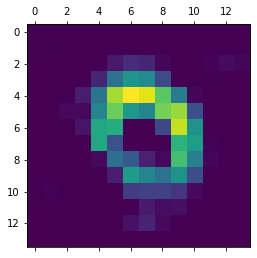

In [134]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [147]:
import cv2

img = cv2.imread(im_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img
cv2.imwrite(base +'flower_cam.jpg', superimposed_img)


True

In [148]:
import matplotlib.pyplot as plt

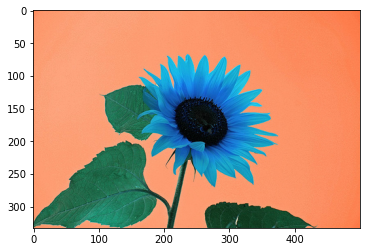

In [149]:
org_im = cv2.imread(im_path)
plt.imshow(org_im)

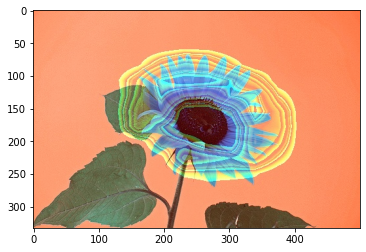

In [150]:
im = cv2.imread(base +'flower_cam.jpg')
plt.imshow(im)